# Airline Passenger Satisfaction Analysis
*Eine datengetriebene Analyse der Passagierzufriedenheit im Luftverkehr*

---

**Erstellt von:** Hasan Hüseyin Demirci, Andreas Hubertus, Sebastian Rein, Vitalii Solonychnyi  

**Modul:** Grundlagen Data Science und Künstliche Intelligenz 1

**Dozentin:** Prof. Dr. Jennifer Schoch  

**Hochschule:** Duale Hochschule Baden-Württemberg Karlsruhe

**Datum:** 22.11.2025

---

## Inhaltsverzeichnis

1. [Einleitung](#einleitung)  
    1.1 [Motivation und Business Understanding](#motivation-und-business-understanding)  
    1.2 [Zielsetzung](#zielsetzung)

2. [Data Understanding](#data-understanding)  
    2.1 [Datenbeschreibung](#datenbeschreibung)
    2.2 Übersicht und Relevanz der Variablen

3. [Data Preparation]

4. Benfords Law – Überprüfung des Datensatzes

5. Korrelationen 
### 5.1 (a) Auswahl geeigneter Korrelationskoeffizienten


6. 


# 1. Einleitung


#### 1.1 Motivation

Die Zufriedenheit von Flugpassagieren ist ein entscheidender Faktor für die Kundenbindung und das Markenimage von Fluggesellschaften. Sie haben daher ein großes Interesse daran, herauszufinden, wie genau die Zufriedenheit des Kunden gesteigert werden kann. 

#### 1.2 Zielsetzung


Die zentrale Forschungsfrage dieser Analyse lautet daher:
*Welche Faktoren beeinflussen die Gesamtzufriedenheit eines Flugpassagiers am meisten und inwiefern korrelieren die einzelenen Faktoren miteinander?*


Der Datensatz "Airline Passenger Satisfaction", der auf Kaggle zur Verfügung steht, ist hierfür die Grundlage.
Er kann über folgenden Link aufgerufen, gedownloaded und ausgelesen werden:

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data

Die Analyse läuft auf Grundlage des CRISP-DM Prozesses, einem standardisierten Vorgehensmodell für Data Science-Projekte.

Zu Beginn des Projekts wurde eine sogenannte SMART-Zielsetzung festgelegt:

- Specific: Eine präzise Forschungsfrage wurde formuliert.  
- Measurable: Die Korrelationskoeffizienten ausgewählter Faktoren werden betrachtet, um ihren Einfluss zu bewerten und zu vergleichen.  
- Achievable: Python mit grundlegenden Funktionen der Bibliotheken NumPy, Pandas und Matplotlib wird genutzt und dem CRISP-DM-Modell wird gefolgt.  
- Realistic: Der Datensatz wird auf Glaubwürdigkeit überprüft und seine Aussagekraft wird eingeschätzt.  
- Time-bound: Die Abgabefrist dieses Notebooks ist der 23.11.2025 und das mündliche Prüfungsgespräch findet am 01.12.2025 statt.


+++Am Ende soll dann ein Fazit gezogen und eine Empfehlung an Airlines gestellt werden, worauf sie beim Service den größten Fokus legen sollten und was welche Kunden gut beziehungsweise schlecht bewerten.+++

# 2. Data Understanding

#### 2.1 Grundlegende Struktur des Datensatzes

In [65]:
import pandas as pd             # Pandas ermöglicht das Laden, Bereinigen und Analysieren von Datenmengen

df = pd.read_csv("train.csv")   # Die Datei "train.cvs" wird eingelesen
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [66]:
rows, cols = df.shape
print("Zeilen:", rows)
print("Spalten:", cols)

Zeilen: 103904
Spalten: 25


Der Datensatz umfasst Informationen zu 103.904 Flugpassagieren, die anhand von 25 Spalten hinsichtlich ihrer Merkmale und persönlichen Bewertungen erfasst wurden.

In [67]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Die Daten wurden durch eine Passagierumfrage erhoben.

### 2.2 Übersicht und Relevanz der Variablen

Zum einen sind persönliche Merkmale berücksichtigt, wie das Geschlecht (gender) oder das Alter (age) sowie die geflogene Klasse (class) oder die Art der Reise (type of travel). 
Zum anderen sind Bewertungen auf einer Skala von 1 bis 5 erkennbar, beispielsweise bezüglich der Verpflegung an Bord (food and drink) oder dem Umgang des Personals mit Gepäcksstücken (baggage handling).
Eine Bewertung mit 0 bedeutet, dass der entsprechende Dienst nicht genutzt wurde. Dies muss später bei der Data Preparation berücksichtigt werden.

Jede Variable ist entweder nominal, kardinal oder ordinal skaliert. Hier ist eine Auflistung aller Variablen samt ihrer Skalenniveaus:


| Merkmal                          | Bedeutung                                                | Skalenniveau |
|----------------------------------|----------------------------------------------------------|--------------|
| Unnamed: 0                       | Technische Index-Spalte (CSV-Export)                     | -            |
| id                               | Eindeutige Passagier-ID                                  | -            |
| Gender                           | Geschlecht des Passagiers                                | nominal      |
| Customer Type                    | Neukunde oder Bestandskunde                              | nominal      |
| Age                              | Alter in Jahren                                          | kardinal     |
| Type of Travel                   | Grund der Reise (Business / Personal)                    | nominal      |
| Class                            | Reiseklasse (Economy, Eco Plus, Business)                | ordinal      |
| Flight Distance                  | Flugdistanz in Meilen                                    | kardinal     |
| Inflight wifi service            | Bewertung des WLAN (1 = schlecht, 5 = sehr gut)          | ordinal      |
| Departure/Arrival time convenient| Bewertung der Zeitplanung (1–5)                          | ordinal      |
| Ease of Online booking           | Bewertung der Online-Buchung (1–5)                       | ordinal      |
| Gate location                    | Bewertung der Gate-Lage (1–5)                            | ordinal      |
| Food and drink                   | Bewertung von Essen & Trinken an Bord (1–5)              | ordinal      |
| Online boarding                  | Bewertung des Online-Boardings (1–5)                     | ordinal      |
| Seat comfort                     | Bewertung der Sitzqualität (1–5)                         | ordinal      |
| Inflight entertainment           | Bewertung des Bord-Entertainments (1–5)                  | ordinal      |
| On-board service                 | Bewertung des Kabinenservices (1–5)                      | ordinal      |
| Leg room service                 | Bewertung der Beinfreiheit (1–5)                         | ordinal      |
| Baggage handling                 | Bewertung der Gepäckabfertigung (1–5)                    | ordinal      |
| Checkin service                  | Bewertung des Check-in-Prozesses (1–5)                   | ordinal      |
| Inflight service                 | Bewertung des Service während des Flugs (1–5)            | ordinal      |
| Cleanliness                      | Bewertung der Sauberkeit (1–5)                           | ordinal      |
| Departure Delay in Minutes       | Abflugverspätung in Minuten                              | kardinal     |
| Arrival Delay in Minutes         | Ankunftsverspätung in Minuten                            | kardinal     |
| satisfaction                     | Zufriedenheit: satisfied / neutral or dissatisfied       | nominal      |


Bei allen Variablen ist durch die Spaltennamen intuitiv klar, welche Informationen daraus gewonnen werden können. 

Für die zentrale Fragestellung, welche Merkmale die Zufriedenheit der Passagiere stark beeinflussen, ist das Zielmerkmal also satisfaction (satisfied / neutral or dissatisfied).

Es ist wichtig zu unterscheiden, auf welche Faktoren eine Airline direkten Einfluss nehmen kann. In engem Zusammenhang mit Service, Komfort oder Verspätungen stehen:

- Class  
- Seat comfort  
- Flight Distance  
- Inflight wifi service  
- Food and drink  
- Inflight entertainment  
- Leg room service  
- On-board service  
- Cleanliness  
- Checkin service  
- Baggage handling  
- Departure Delay in Minutes  
- Arrival Delay in Minutes 
- Arrival Delay in Minutes  

Teilweise relevante Merkmale, die zwar die Wahrnehmung eines Passagiers beeinflussen können, aber nicht den Service selbst, sind:

- Age  
- Type of Travel  
- Customer Type  
- Gender  


Die Attribute *id* und *Unnamed: 0* tragen natürlich nicht zur Analyse der Zufriedenheit bei



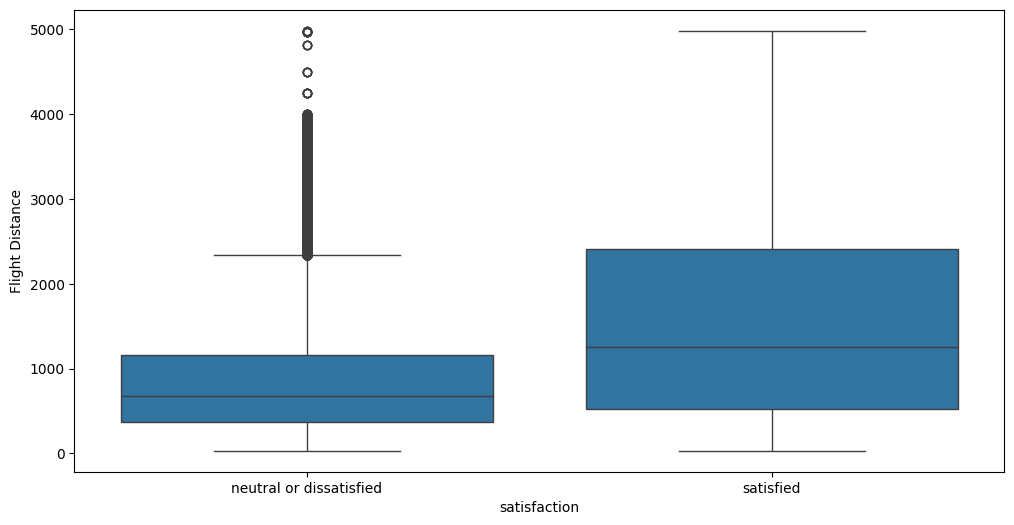

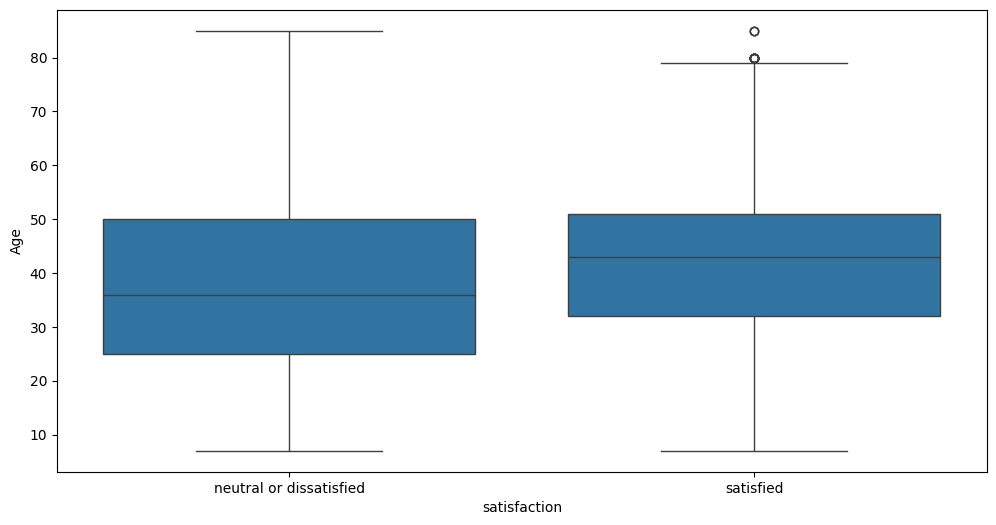

In [68]:
list_boxplot_vars = ["Flight Distance",'Age'] #Liste der Boxplotvariablen
for var in list_boxplot_vars: # Schleife über die Boxplotvariablen
    plt.figure(figsize = [12,6]) # Erstellen der Figur
    sns.boxplot(df, x= 'satisfaction', y=var) # Erstellen des Boxplots
    plt.show() # Anzeigen des Plots

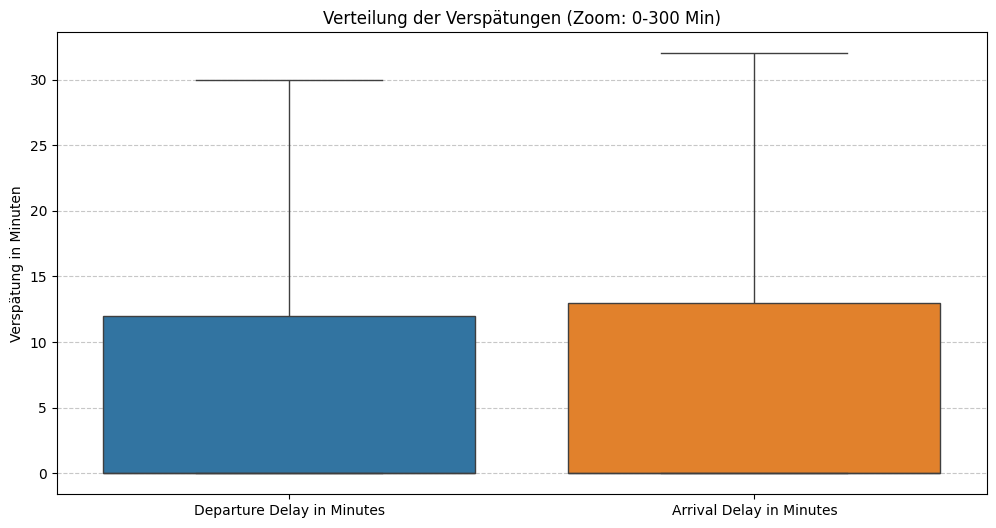

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

list_delays_vars = ["Departure Delay in Minutes", "Arrival Delay in Minutes"]

plt.figure(figsize=[12,6])

# Boxplot erstellen
sns.boxplot(data=df[list_delays_vars], showfliers=False)


# Beschriftung und Raster für bessere Lesbarkeit
plt.title("Verteilung der Verspätungen (Zoom: 0-300 Min)")
plt.ylabel("Verspätung in Minuten")
plt.grid(axis='y', linestyle='--', alpha=0.7) # Hilfslinien hinzufügen

plt.show()

In diesem Boxplot wird die Verteilung der Verspätungen visualisiert. Ausreiser wurden an dieser Stelle ausgeblendet, reichen aber, wie unten in der Tabelle zu sehen, bis etwa 1600 Minuten.


In [70]:
df[["Departure Delay in Minutes", "Arrival Delay in Minutes"]].describe()

,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103594.000000
mean,14.815618,15.178678
std,38.230901,38.698682
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000



*TODO* Auffälligkeiten
Auffälig ist, dass die Bewertungen durchschnittlich fast alle im Bereich von 3 bis 4 liegen.

Es ist sinnvoll, 


Durch Indexing ist es möglich, gezielt Werte in dem Datensatz zu filtern.
Wir formulieren folgende Fragen, die wir danach mithilfe von Indexing beantworten möchten:

- Wie hoch ist die Zufriedenheit (satisfaction) je nach Geschlecht und Alter?
- Wie hoch ist sie je nach Kundentyp beziehungsweise je nach Art der Reise?
- Welchen Einfluss haben Flugverspätungen auf die Zufriedenheit der Gäste?
- Wie werden die verschiedenen Service-Kategorien bewertet?
- Wirkt sich die geflogene Distanz (flight distance) auf die Zufriedenheit aus?

##ToDO: Hypothesen beantworten mith von Indexin und klären, warum wir das ganze überhaupt machen 


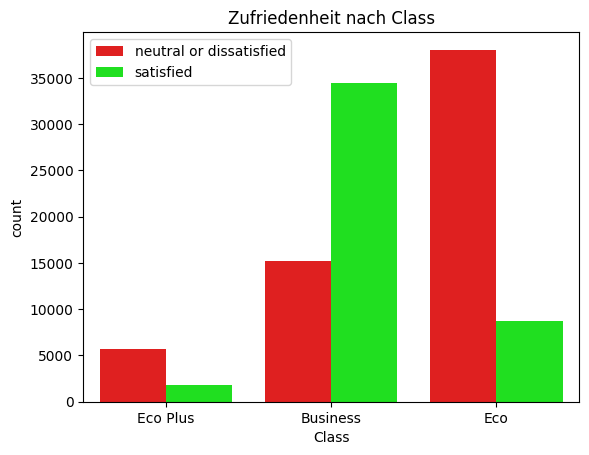

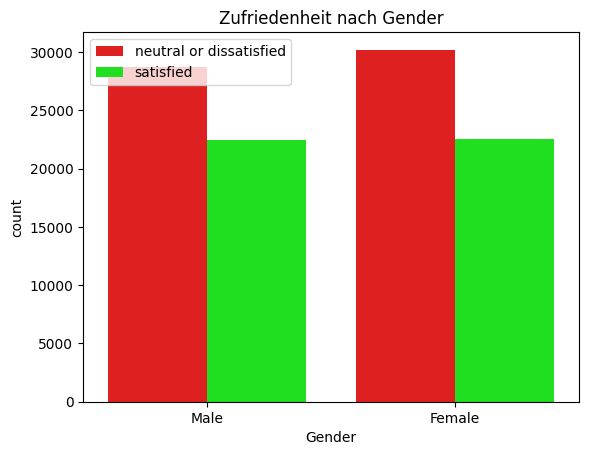

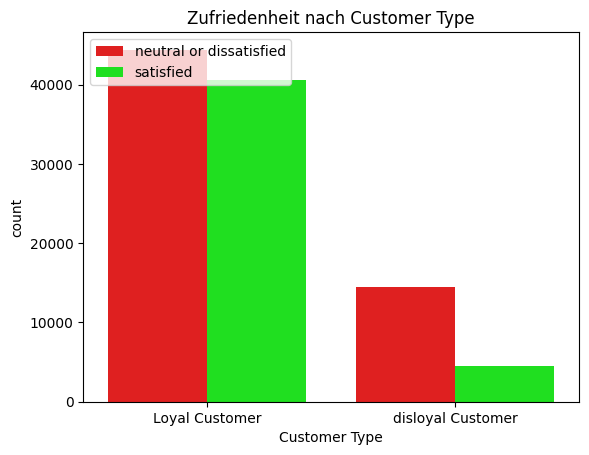

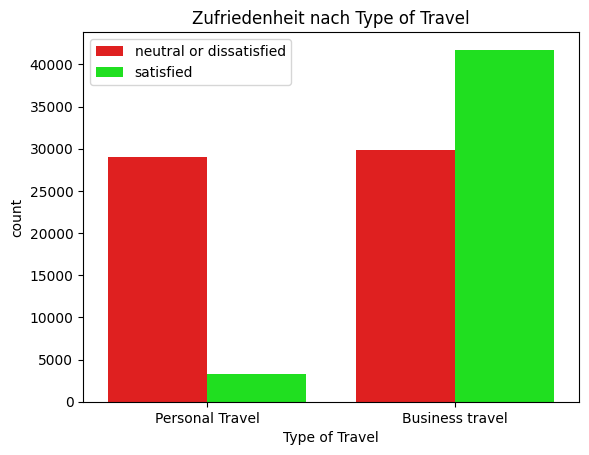

In [71]:
columns = ["Class","Gender","Customer Type","Type of Travel",] #Kategorische Variablen
for column in columns: # Schleife über die kategorischen Variablen
    sns.countplot(x= column, hue = "satisfaction", data = df, palette = ["red", "lime"]) # Erstellen des Countplots
    plt.title(f"Zufriedenheit nach {column}") # Titel des Plots
    plt.legend(loc = "upper left") # Legende oben links
    plt.show() # Anzeigen des Plots

# 3. Data Preparation

In [72]:
import numpy as np 

rating_cols = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

df[rating_cols] = df[rating_cols].replace(0, np.nan)

df.isna().sum()

Unnamed: 0                              0
id                                      0
Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                3103
Departure/Arrival time convenient    5300
Ease of Online booking               4487
Gate location                           1
Food and drink                        107
Online boarding                      2428
Seat comfort                            1
Inflight entertainment                 14
On-board service                        3
Leg room service                      472
Baggage handling                        0
Checkin service                         1
Inflight service                        3
Cleanliness                            12
Departure Delay in Minutes              0
Arrival Delay in Minutes          

Nach dem Ersetzen der 0-Werte durch echte fehlende Werte (NaN) zeigt sich, dass mehrere Service-Bewertungen Lücken enthalten. Diese 0-Einträge standen nicht für eine schlechte Bewertung, sondern dafür, dass Passagiere keine Angabe gemacht haben. Damit die Analyse vollständig bleibt, werden die fehlenden Werte anschließend mit dem Median der jeweiligen Spalte imputiert.

In [73]:
# Fehlende Werte durch Median ersetzen
for col in rating_cols:
    median_value = np.nanmedian(df[col])
    df[col] = df[col].fillna(median_value)
    
df.isna().sum().sum()

np.int64(310)

In [74]:
df.duplicated().sum()

np.int64(0)

Der Datensatz enthält keine Duplikate (0 doppelte Zeilen).  


In [75]:
# Negative Alterswerte?
print("Negative Alterswerte:", (df['Age'] < 0).sum())

# Alterswerte > 100?
print("Alter > 100:", (df['Age'] > 100).sum())

# Negative Verspätungen?
print("Negative Abflugverspätung:", (df['Departure Delay in Minutes'] < 0).sum())
print("Negative Ankunftsverspätung:", (df['Arrival Delay in Minutes'] < 0).sum())

# Ungültige Werte in satisfaction?
print("Ungültige satisfaction-Werte:", df[~df['satisfaction'].isin(['satisfied', 'neutral or dissatisfied'])].shape[0])

Negative Alterswerte: 0
Alter > 100: 0
Negative Abflugverspätung: 0
Negative Ankunftsverspätung: 0
Ungültige satisfaction-Werte: 0


Es wurden keine fehlerhaften Werte gefunden. Alle Altersangaben sind plausibel, Verspätungen sind nicht negativ und die Zufriedenheitsvariable enthält nur gültige Kategorien.  

Die einzigen unnötigen Spalten sind *id* und *Unnamed: 0*, welche rein technische Funktionen haben und entfernt wurden. Damit enthält der Datensatz nun nur noch inhaltlich relevante Variablen.
Ansonsten ist der Datensatz sauber und gut nutzbar für die weitere Analyse.

In [76]:
cols_to_drop = [col for col in ["id", "Unnamed: 0"] if col in df.columns]
print("Entfernte Spalten:", cols_to_drop)
df = df.drop(columns=cols_to_drop)
df.columns

# TODO: Satisfactio_bin muss weg

Entfernte Spalten: ['id', 'Unnamed: 0']


Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Der Datensatz wurde vollständig bereinigt und ist nun bereit für die weitere Analyse.

# 4. Benfords Law – Überprüfung des Datensatzes

In diesem Abschnitt prüfen wir einige numerische Spalten unseres Datensatzes mit dem Benford´s Law.  
Benfords Law beschreibt die typische Verteilung der führenden Ziffern in natürlich vorkommenden Zahlen. Wenn die tatsächliche Verteilung davon stark abweicht, kann das auf ungewöhnliche Muster oder mögliche Probleme im Datensatz hinweisen.

Wir betrachten dafür die Spalten Flight Distance, Age, Arrival Delay in Minutes und Departure Delay in Minutes, extrahieren deren führende Ziffern und vergleichen sie mit der erwarteten Benford-Verteilung.

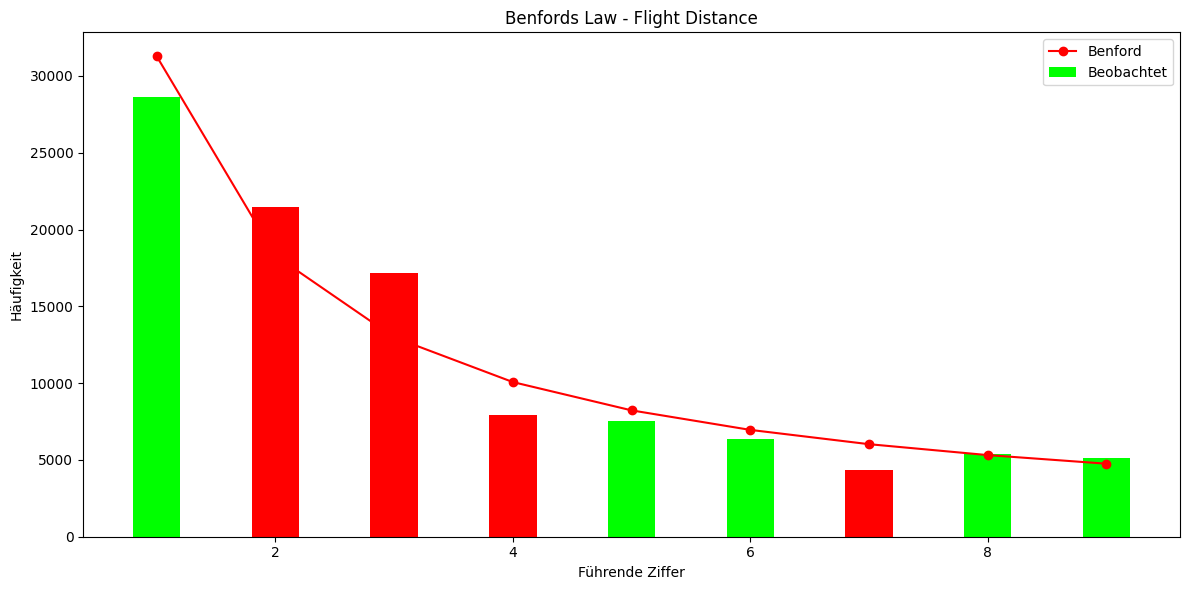

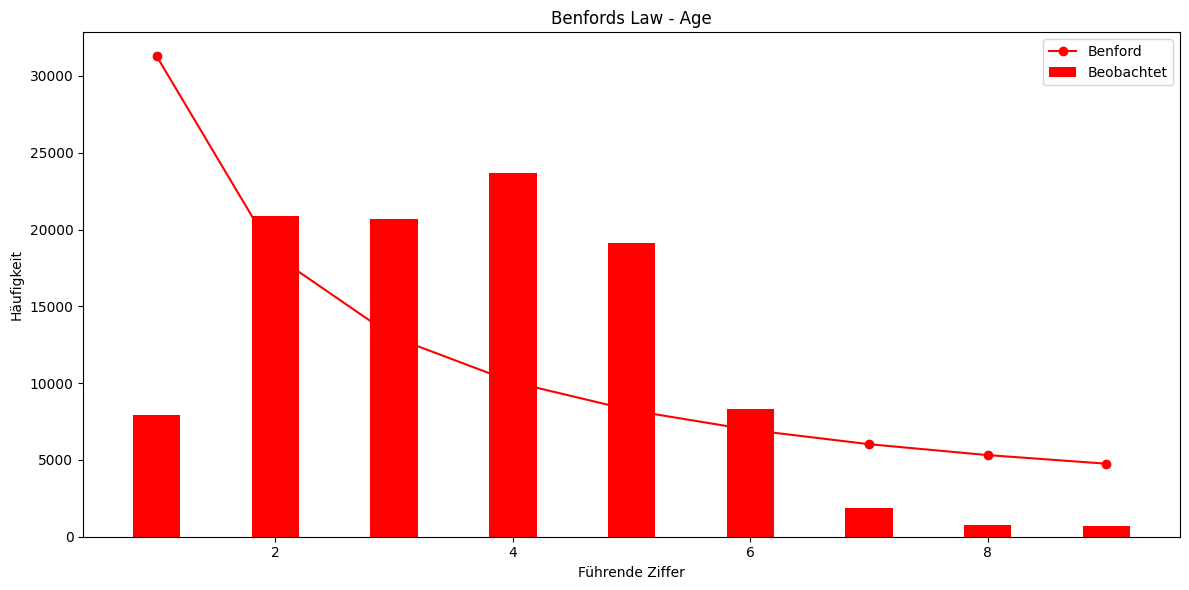

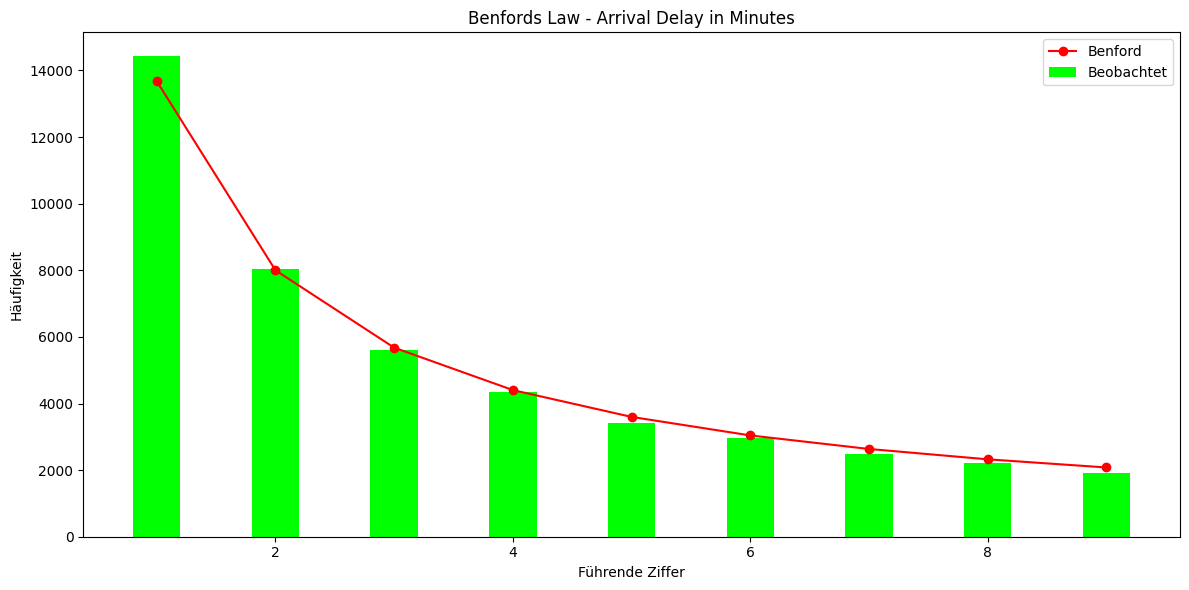

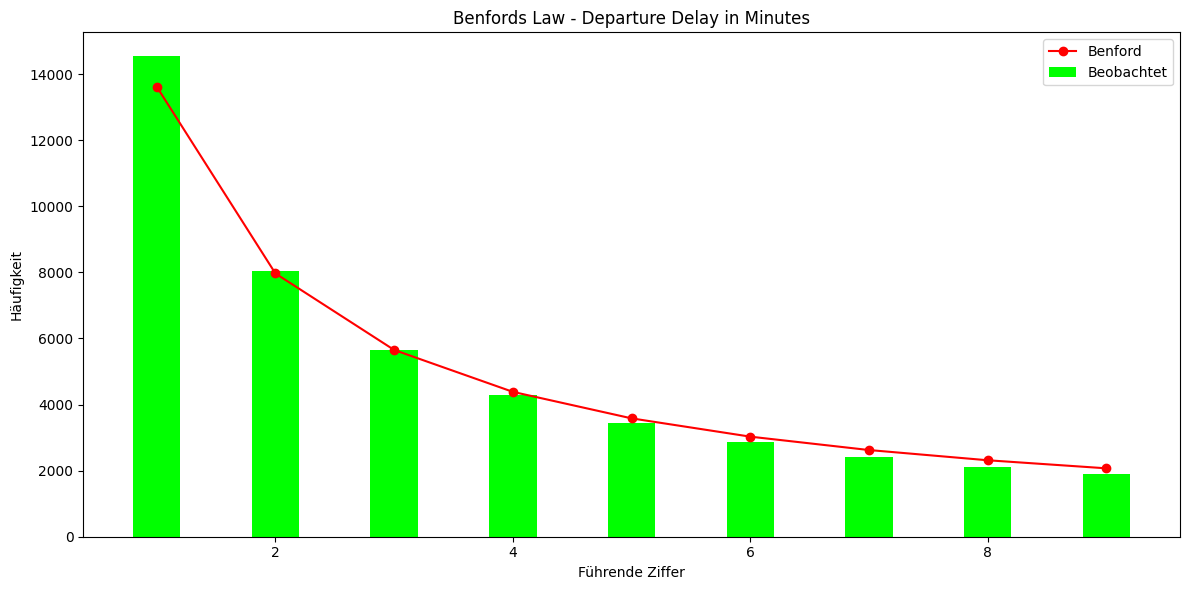

In [77]:
# Matplotlib wird für die Visualisierung importiert
import matplotlib.pyplot as plt     

columns = ["Flight Distance","Age","Arrival Delay in Minutes", "Departure Delay in Minutes"]


for column in columns:

    values = df[column]
    values = values[values > 0]

    # Extrahieren der führenden Ziffern
    leading = values.astype(str).str[0].astype(int)
    
    # Häufigkeiten der führenden Ziffern berechnen
    observed_counts = leading.value_counts().sort_index()
    
    # Benfordslaw Verteilungs erstellung
    benford = pd.Series({d: np.log10(1+1/d) for d in range(1,10)})* len(leading)

    # Farben basierend auf Abweichung von Benford
    colors = ["Lime" if abs(observed_counts[i]- benford[i])/ benford[i] < 0.1 else "Red" for i in range(1,10)]

    plt.figure(figsize=[12,6])
    plt.bar(observed_counts.index ,observed_counts.values, width = 0.4, label = "Beobachtet", color = colors)


    plt.plot(observed_counts.index  , benford, 'ro-' ,label = "Benford")
    plt.xlabel("Führende Ziffer")
    plt.ylabel("Häufigkeit")
    plt.title(f"Benfords Law - {column}")
    plt.legend()
    plt.tight_layout()
    plt.show()

# TODO: Bei erstem Schaubild rot zu legende hinzufügen

   

## Ergebnisse: Folgen die Daten Benford?
Da eine Zahlenverteilung, die dem Benford-Gesetz nicht exakt entspricht, streng genommen nicht als vollständig benford-konform gelten kann, wurde festgelegt, dass eine Verteilung als benford-konform betrachtet wird, wenn die mittlere Abweichung unter 10 % liegt. Auf dieser Grundlage ergibt sich ein erstes Indiz dafür, dass unser Datensatz nicht manipuliert wurde und die Daten als glaubwürdig eingestuft werden können.


### 1.Flight Distance
- Bei der Auswertung zeigt sich ein abnehmender Trend wie bei Benford, dieser ist jedoch zu Beginn deutlich schwächer ausgeprägt.

### 2.Age
- Die Variable Age zeigt keinerlei Übereinstimmung mit Benfords Law und folgt eher einer Normalverteilung. Davon war von auszugehen, da die Altersverteilung natürlich nicht dem Benfords Law folgt.

### 3.Arrival Delay in Minutes und 4.Departure Delay in Minutes
- Sowohl Arrival als auch Departure Delay folgen konsequent dem Benfords Law.

### Fazit

Insgesamt wirken die Daten plausibel. Nicht alle Spalten entsprechen dem Benfords Law, was bei Variablen wie dem Alter ganz normal ist. Wichtig ist, dass keine ungewöhnlichen oder auffälligen Muster erkennbar sind. Besonders die Verzögerungszeiten passen gut zu Benford.

Damit gibt es keine Hinweise auf künstliche Veränderungen oder manipulierte Daten. Der Datensatz wirkt stimmig und realistisch.

# 5 Korrelationen

TODO: Median mittelwert streuung,

### 5.1 (a) Auswahl geeigneter Korrelationskoeffizienten

Basierend auf den Skalenniveaus in unserem Datensatz ergeben sich folgende Zuordnungen:

| Variablentyp / Skalenniveau           | Beispielmerkmale                                 | Geeigneter Korrelationskoeffizient |
|---------------------------------------|--------------------------------------------------|------------------------------------|
| Kardinal – Kardinal               | Flight Distance, Departure Delay, Age            | Bravais-Pearson-Korrelationskoeffizient |
| Ordinal – Ordinal                 | Seat comfort, Food and drink, Cleanliness        | Spearmans Korrelationskoeffizient       |
| Nominal – Nominal                 | Gender, Type of Travel, Customer Type, satisfaction | Chi-Quadrat-Koeffizient (mit Kontingenztabelle), Cramer´s V|


#### Unsere Vermutungen:
1. Je höher der Sitzkomfort bewertet wird, desto größer ist die Wahrscheinlichkeit, dass ein Passagier zufrieden ist. 
2. Flüge mit größerer Flugdistanz haben tendenziell länger Abflugverspätung.
3. Es gibt keinen signifikanten Unterschied in der Zufriedenheit zwischen männlichen und weiblichen Passagieren.

### 5.1 (b) Prüfung unserer Vermutungen

1. Je höher der Sitzkomfort, desto zufriedener die Passagiere.

Methode: Spearman (ordinal)

In [78]:
# satisfaction in binäre Form umwandeln (1 = zufrieden, 0 = unzufrieden)
df['satisfaction_bin'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

df[['Seat comfort', 'satisfaction_bin']].corr(method='spearman')

,Seat comfort,satisfaction_bin
Seat comfort,1.000000,0.362187
satisfaction_bin,0.362187,1.000000


Die Korrelation von 0.36 bestätigt einen moderaten positiven Zusammenhang. Je höher der Sitzkomfort bewertet wird, desto zufriedener sind die Passagiere.  
Die Vermutung wird damit bestätigt.

2. Flüge mit größerer Flugdistanz haben tendenziell länger Abflugverspätung.

Methode: Bravais–Pearson (kardinal)

In [79]:
df[['Flight Distance', 'Departure Delay in Minutes']].corr(method='pearson')

,Flight Distance,Departure Delay in Minutes
Flight Distance,1.000000,0.002158
Departure Delay in Minutes,0.002158,1.000000


Der Korrelationswert liegt mit 0.002 praktisch bei 0.  
Es gibt also keinen linearen Zusammenhang zwischen Flugdistanz und Abflugverspätung.  
Längere Flüge starten demnach nicht häufiger verspätet als kürzere.

Damit wird unsere ursprüngliche Vermutung widerlegt.

3. Es gibt keinen signifikanten Unterschied in der Zufriedenheit zwischen männlichen und weiblichen Passagieren.

Methode: Chi-Quadrat-Test + Cramer’s V (nominal)

In [80]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Kontingenztabelle erstellen
ct = pd.crosstab(df['Gender'], df['satisfaction'])

# Chi-Quadrat-Test durchführen
chi2, p, dof, expected = chi2_contingency(ct)

# Cramer's V berechnen
n = ct.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(ct.shape) - 1)))

print("Chi-Quadrat:", chi2)
print("p-Wert:", p)
print("Cramer's V:", cramers_v)


Chi-Quadrat: 15.44441742614322
p-Wert: 8.496755458033522e-05
Cramer's V: 0.012191850597584968


Der p-Wert liegt deutlich unter 0.05, also besteht ein statistisch signifikanter Unterschied.
Allerdings ist Cramer’s V mit 0.01 extrem niedrig, was auf einen sehr schwachen Effekt hinweist.
Praktisch gibt es also keinen relevanten Unterschied in der Zufriedenheit zwischen Männern und Frauen.

### 5.1 (c) Fazit:
Unsere Analysen zeigen, dass Komfort- und Servicefaktoren (z. B. Sitzkomfort) einen klaren Einfluss auf die Zufriedenheit der Passagiere haben. Dagegen besteht kein Zusammenhang zwischen Flugdistanz und Verspätung. Auch das Geschlecht der Passagiere spielt praktisch keine Rolle für die Zufriedenheit. Insgesamt wurden zwei Vermutungen bestätigt und eine widerlegt.

### 5.2 Korrelationsmatrix
Nun wollen wir die Korrelation zwischen allen Bewertungen beobachten. Am besten gelingt uns dies mit einer Korrelationsmatrix. Hierfür unterteilen wir die Korrelationen zweier Variablen in stark (grün), mittelstark (blau) und schwach (rot).
Um diese Matrix implementieren zu können, führen wir nun das Seaborn Package ein.


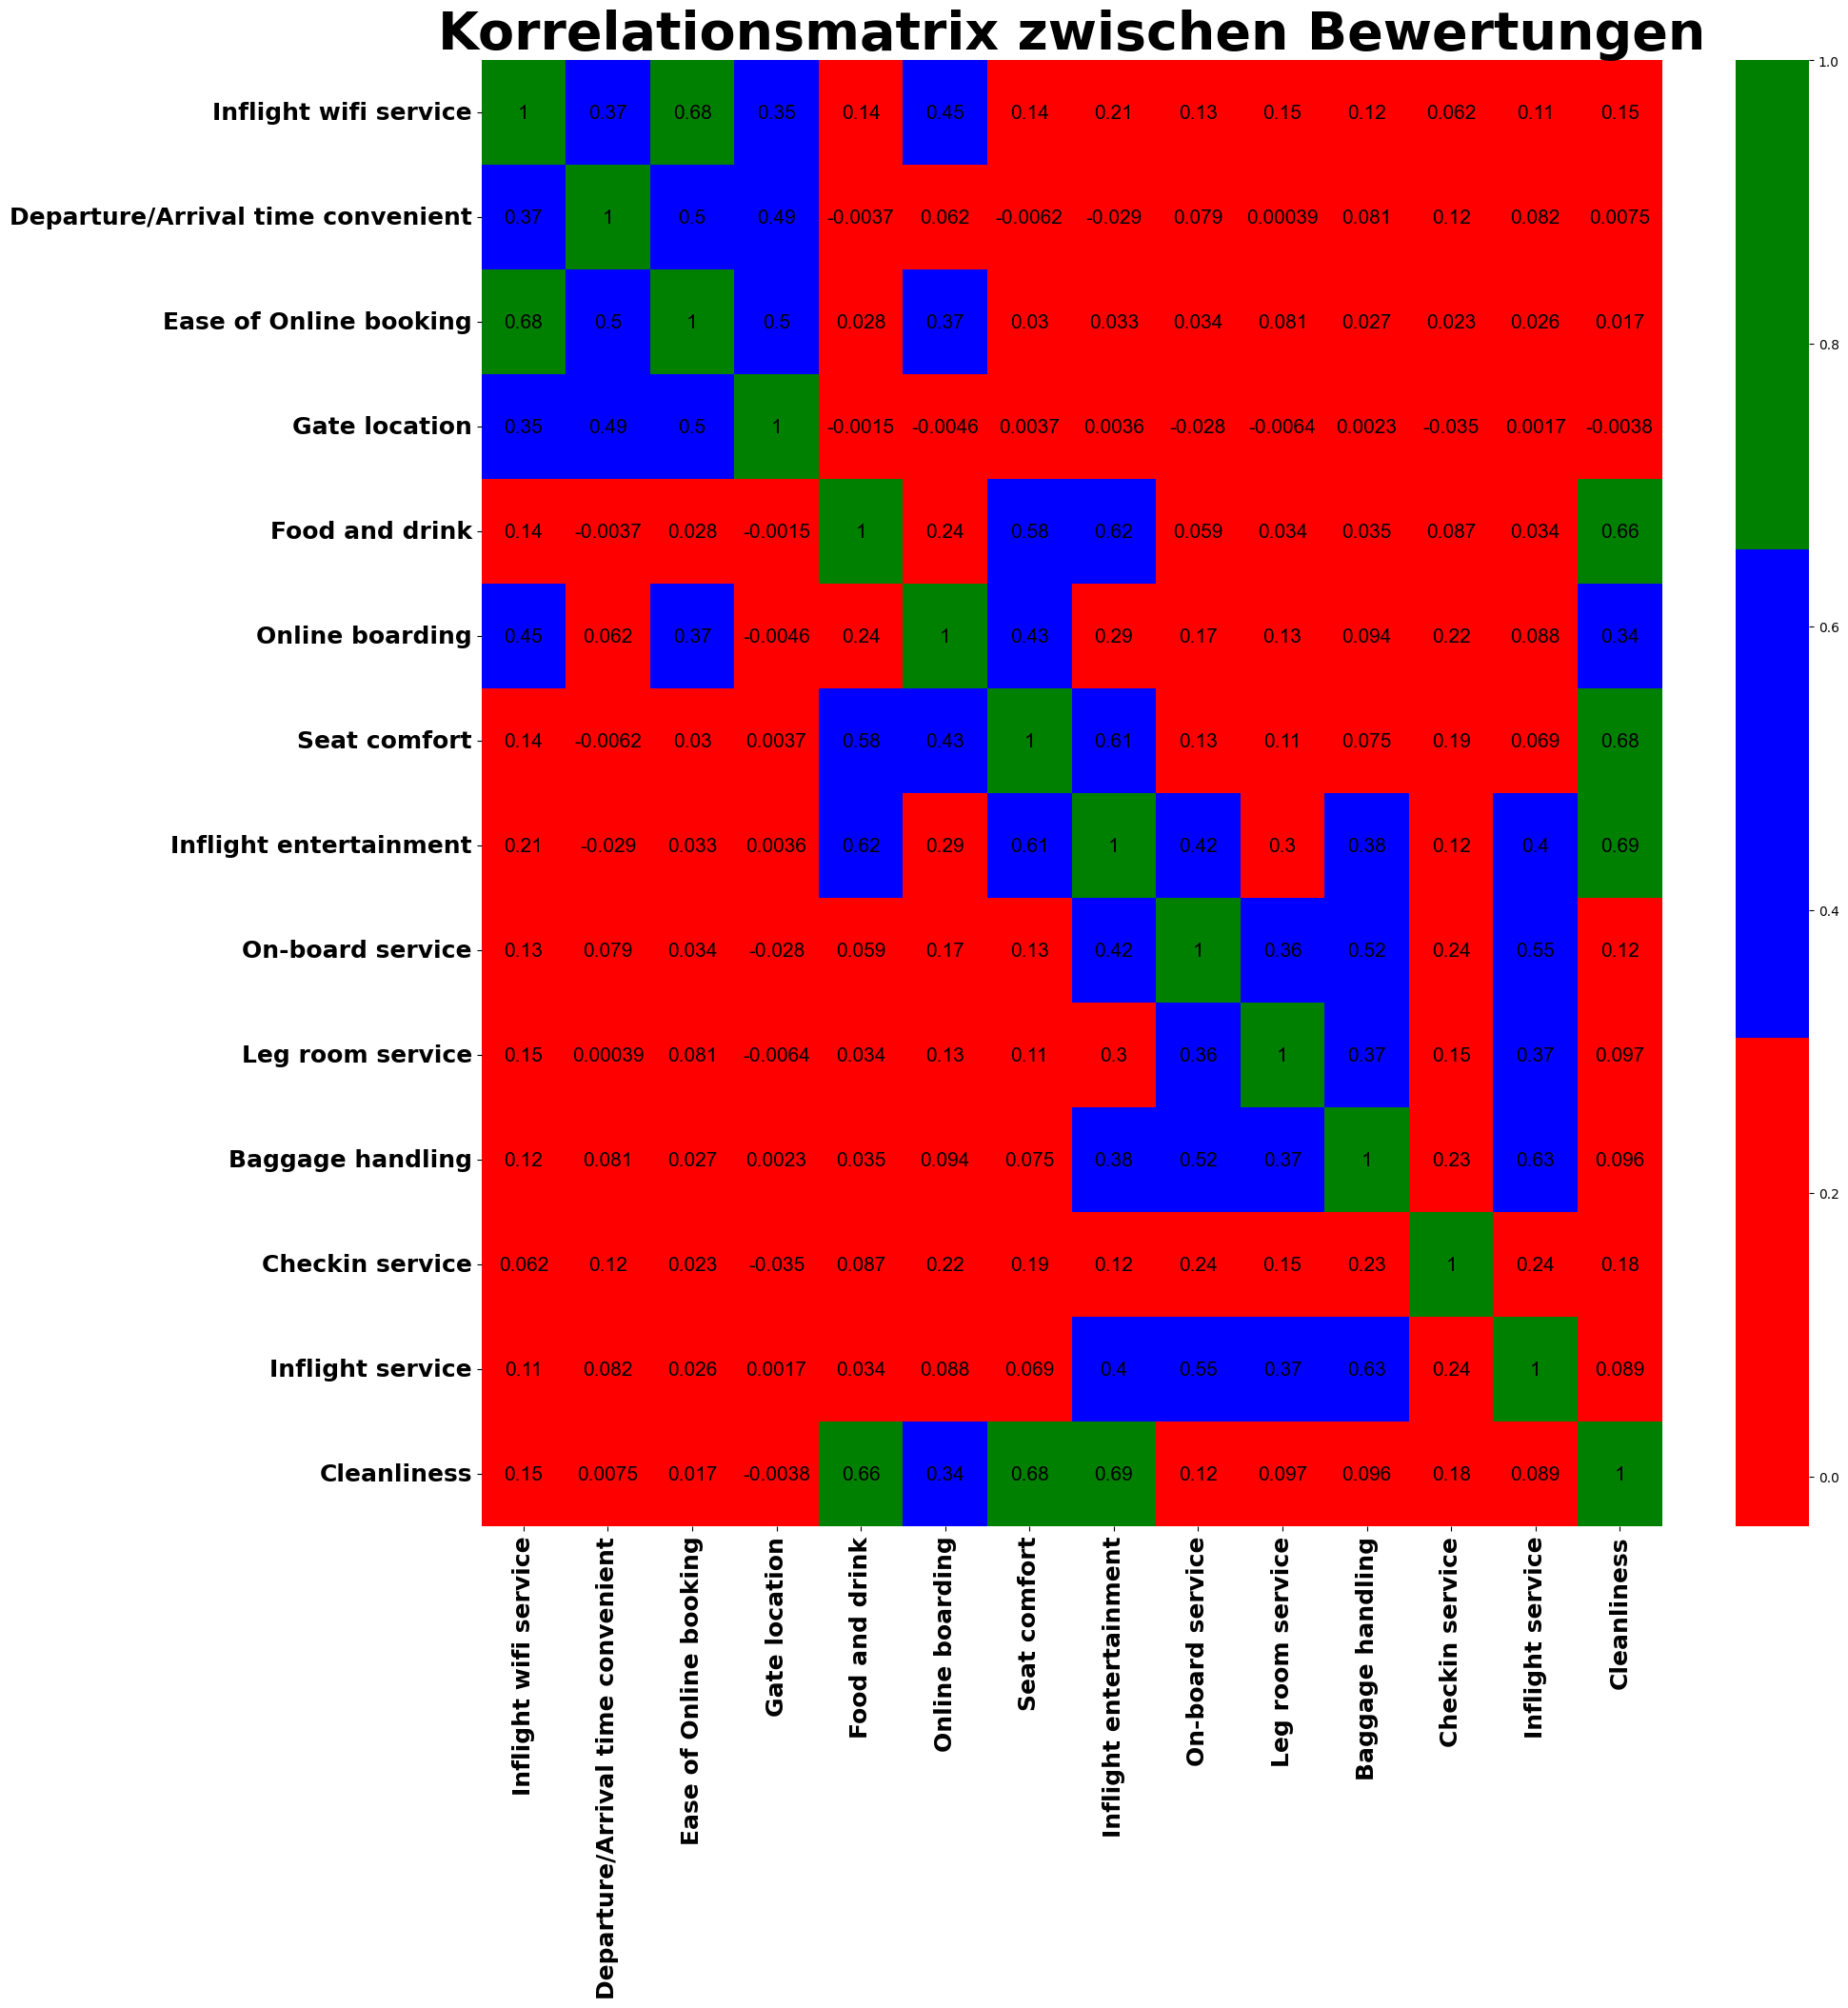

In [81]:
import seaborn as sns

num_cols = df.select_dtypes(include=np.number).columns.drop(["satisfaction_bin", "Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"])
corr = df[num_cols].corr()
plt.figure(figsize=[20, 20])
sns.heatmap(corr, annot=True, cmap=["Red", "Blue", "Green"],
            annot_kws={"size": 15, "fontname": "Arial", "color": "black"})
plt.title("Korrelationsmatrix zwischen Bewertungen", fontsize=40, fontweight="bold")
plt.xticks(rotation=90)

# Achsenbeschriftungen größer machen
plt.xticks(fontsize=18, fontweight="bold", rotation=90)
plt.yticks(fontsize=18, fontweight="bold", rotation=0)

plt.show()

## Analyse der Korrelationsmatrix

### 1. Digitale Services
- **Inflight Wifi Service, Ease of Online Booking, Online Boarding, Departure/Arrival time convenient, Gate Location**  
  - Starke Zusammenhänge untereinander.  
  - Interpretation: Airlines, die in digitale Services investieren, bieten ein ganzheitlich optimiertes Passagiererlebnis; reibungslose Buchung, gutes WLAN, leicht erreichbare Gates und pünktliche Zeiten steigern die wahrgenommene Qualität.

### 2. Komfort & Ausstattung
- **Seat Comfort, Leg Room Service, Inflight Entertainment, Food and Drink, Cleanliness**  
  - Korrelationen zwischen Sitzkomfort, Beinfreiheit, Entertainment, Essen und Sauberkeit.  
  - Interpretation: Physischer Komfort, Hygiene und Ablenkung durch Entertainment/Essen verstärken das subjektive Wohlbefinden; Mängel an einer Stelle beeinflussen andere Bewertungen negativ.

### 3. Servicequalität
- **Inflight Service, On-Board Service, Baggage Handling**  
  - Enge Zusammenhänge; Kabinenpersonal beeinflusst Wahrnehmung von Bordservice und Gepäckhandling.  
  - Interpretation: Guter menschlicher Service erzeugt Halo-Effekt, der andere Serviceaspekte positiv färbt.

### 4. Checkin
- **Checkin Service**  
  - Keine signifikanten Korrelationen.  
  - Interpretation: Wahrnehmung unabhängig von anderen Faktoren, Einfluss auf Gesamterlebnis eher isoliert.


### 5.3 (a)  Korrelationen zwischen numerischen Merkmalen und Zufriedenheit
In diesem Schritt betrachten wir die Zufriedenheitsvariable nochmal in ihrer binäre Form um und berechnen anschließend die linearen Korrelationen zwischen allen numerischen Merkmalen und der Zufriedenheit. Die Korrelationswerte werden sortiert und in einem Balkendiagramm dargestellt, um sichtbar zu machen, welche Faktoren positiv oder negativ mit der Kundenzufriedenheit zusammenhängen.

In [82]:
satisfaction_map = {
    "neutral or dissatisfied": 0,
    "satisfied":1
}
numeric_df= df.select_dtypes(include= ['int64', 'float64']).drop(columns=['id','Unnamed: 0'])

correlations = numeric_df.corrwith(df["satisfaction"].map(satisfaction_map)).sort_values(ascending= False)

colors = ['lime' if v > 0 else 'red' for v in correlations]

plt.figure(figsize = [12,6])
plt.bar(correlations.index, correlations, color = colors)
plt.xticks(rotation = 25, ha = "right")
plt.show()

KeyError: "['id', 'Unnamed: 0'] not found in axis"

### 5.3 (b) Fazit

Die Analyse zeigt, dass vor allem der Online-Boarding-Prozess stark mit der Zufriedenheit zusammenhängt. Ein Wert von etwa 0.5 bedeutet, dass Menschen, die diesen Teil der Reise gut finden, insgesamt deutlich öfter zufrieden sind. Gleichzeitig sieht man, dass keine einzelne Variable eine perfekte Erklärung liefert – Zufriedenheit entsteht aus mehreren Bereichen zusammen.

Auf der anderen Seite wirken sich Verspätungen klar negativ aus. Wenn sich Ankunft oder Abflug verzögern, geben Passagiere wesentlich häufiger an, unzufrieden oder neutral zu sein. Das bestätigt, dass Delays ein echter Frustfaktor sind und die gesamte Reiseerfahrung spürbar beeinflussen.


# 6. Fazit und Beantwortung der Forschungsfrage

### 6.1 Rückblick auf die Forschungsfrage

Zu Beginn dieses Portfolios wurde folgende zentrale Forschungsfrage gestellt:
*"Welche Faktoren beeinflussen die Gesamtzufriedenheit eines Flugpassagiers am meisten und inwiefern korrelieren die einzelnen Faktoren miteinander?"*

Die durchgeführte Analyse des Datensatzes liefert hierauf klare Antworten und zeigt, dass die Zufriedenheit nicht von einem einzelnen Merkmal abhängt, sondern das Ergebnis eines Zusammenspiels aus digitalen Prozessen, physischem Komfort und Pünktlichkeit ist.

### 6.2 Hauptergebnisse der Analyse

**1. Einflussfaktoren auf die Gesamtzufriedenheit:**
Die Untersuchung der Korrelationen hat gezeigt, dass der **Prozess vor dem Flug** oft wichtiger ist als das Erlebnis an Bord selbst.
* **Stärkster positiver Treiber:** Das **Online Boarding** weist die höchste Korrelation zur Zufriedenheit auf (ca. 0,5). Passagiere, die diesen Prozess als reibungslos empfinden, sind mit hoher Wahrscheinlichkeit insgesamt zufrieden.
* **Wichtige Komfortfaktoren:** Auch *Inflight Entertainment*, *Seat Comfort* und *Leg Room Service* haben einen signifikanten positiven Einfluss.
* **Negative Einflussfaktoren:** Verspätungen (*Departure/Arrival Delay*) wirken sich erwartungsgemäß negativ auf das Kundenerlebnis aus.
* **Irrelevante Faktoren:** Die Analyse hat widerlegt, dass das Geschlecht (*Gender*) einen Einfluss auf die Zufriedenheit hat (Cramer’s V ≈ 0,01). Auch die Flugdistanz hat keinen direkten linearen Zusammenhang mit der Wahrscheinlichkeit von Verspätungen.

**2. Korrelationen der Faktoren untereinander:**
Die Korrelationsmatrix offenbarte, wie Passagiere verschiedene Servicebereiche wahrnehmen:
* **Digitales Erlebnis:** Bewertungen für *Inflight Wifi*, *Online Booking* und *Online Boarding* korrelieren stark miteinander. Eine Airline mit guter IT-Infrastruktur punktet meist in all diesen Bereichen gleichzeitig.
* **Physisches Wohlbefinden:** Es gibt einen engen Zusammenhang zwischen *Cleanliness*, *Food and Drink* und *Seat Comfort*. Dies deutet darauf hin, dass Sauberkeit stellvertretend für die allgemeine Qualität der Kabine wahrgenommen wird.
* **Service-Personal:** Die Bewertung des Kabinenpersonals (*On-board Service*) strahlt auf andere Bereiche wie *Baggage Handling* und *Inflight Service* aus (Halo-Effekt).

### 6.3 Datenqualität
Die Überprüfung mittels Benford’s Law bestätigte die Glaubwürdigkeit der numerischen Daten (z.B. bei den Verspätungsminuten), sodass von einem validen, nicht manipulierten Datensatz ausgegangen werden kann.

### 6.4 Handlungsempfehlung
Um die Forschungsfrage abschließend in eine Empfehlung zu übersetzen: Airlines sollten ihre Ressourcen priorisiert sowohl in die Optimierung der digitalen Schnittstellen (App/Webseite für Boarding), als auch in den allgemeinen Komfort (zum Beispiel der Sauberkeit) investieren.

### 6.5 Ausblick
Ein logischer nächster Schritt im Sinne des CRISP-DM-Prozesses wäre die Modellierung.

Auf Basis der identifizierten Korrelationen könnte ein Vorhersagemodell trainiert werden, um vorherzusagen, ob ein neuer Passagier zufrieden sein wird oder nicht. Ein solches Modell würde es Fluggesellschaften ermöglichen, proaktiv unzufriedene Kunden zu identifizieren und gezielt gegenzusteuern.
